# FCA analysis - preprocessing

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys


def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = './figures/preprocessing/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

-----
anndata     0.7.5
scanpy      1.7.0rc1
sinfo       0.3.1
-----
PIL                 8.1.2
anndata             0.7.5
anyio               NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
brotli              NA
cairo               1.20.0
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.03.0
dateutil            2.8.1
decorator           4.4.2
get_version         2.1
google              NA
h5py                3.1.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.4.1
jupyterlab_server   2.3.0
kiwisolver          1.3.1
legacy_api_wrap     0.0.0
leidenalg           0.8

'/opt/conda/bin/python'

## Import data
Import sample metadata

In [17]:
data_dir = '/nfs/users/nfs_l/lg18/team292/lg18/gonads/data/scRNAseq/FCA/'
meta = pd.read_csv(data_dir+'rawdata/meta_noimmune_v2.csv',index_col=0)
meta['stage'] = meta['stage'].astype('str')
plotmeta = list(meta.columns)
plotmeta.append('sample')
print('Number of samples: ', meta.index.size)

Number of samples:  53


In [18]:
meta

,individual,location,stage,sex,study,batch_collection,process,cryopreserved,TP,5v1.1
sample,,,,,,,,,,
FCA_GND8047885,F81,Gonad,8.8,female,FCA,A,CD45-,No,U,5v1.1
FCA_GND8125923,F86,Gonad,7.5,female,FCA,B,CD45-,No,U,5v1.1
FCA_GND8125925,F87,Gonad,11.0,female,FCA,B,CD45-,No,U,5v1.1
FCA_GND8103050,F83,Gonad,17.0,female,FCA,C,CD45-,No,U,5v1.1
FCA_GND8103053,F84,Gonad,9.0,female,FCA,Cpoor,CD45-,No,U,5v1.1
FCA_GND8622625,F89,Gonad,8.4,female,FCA,E,total,No,U,5v1.1
FCA_GND8622626,F89,Gonad,8.4,female,FCA,E,total,No,U,5v1.1
FCA_GND8622628,F91,Gonad,11.0,female,FCA,E,CD45-,No,U,5v1.1
FCA_GND8715408,F96,Gonad,14.0,female,FCA,F,CD45-,No,Med,5v1.1


## Preprocessing
### Load 10x 

Filter: 1) cells (< 10 genes); 2) genes (< 3 cells) 

Quantify: 1) % mitochondrial genes; 2) total counts


In [19]:
holder = []
for sample in meta.index:
    print(sample)
    # Load 10x data as AnnData
    holder.append(sc.read_10x_mtx(data_dir+'rawdata/'+sample+'/filtered_feature_bc_matrix/',cache=True)) 
    # Set names of observation as sample + _ + barcode/probe
    holder[-1].obs_names = [sample+'_'+i.split('-')[0] for i in holder[-1].obs_names]
    # Filer genes expressed in less than 3 cells
    sc.pp.filter_genes(holder[-1], min_cells=3)
    # Filer cells with less than 10 genes expressed
    sc.pp.filter_cells(holder[-1], min_genes=150)
    # add in metadata
    holder[-1].obs['sample'] = sample
    for val in meta.columns:
        holder[-1].obs[val] = meta[val][sample]
    # Extract mitochondial genes
    mito_genes = [name for name in holder[-1].var_names if name.startswith('MT-')]
    #for each cell compute fraction of counts in mito genes vs. all genes
    #the `.A1` is only necessary, as X is sparse - it transform to a dense array after summing
    holder[-1].obs['percent_mito'] = np.sum(
        holder[-1][:, mito_genes].X, axis=1).A1 / np.sum(holder[-1].X, axis=1).A1
    #add the total counts per cell as observations-annotation to adata
    holder[-1].obs['n_counts'] = holder[-1].X.sum(axis=1).A1
    print('Total number of cells: {:d}'.format(holder[-1].n_obs))
    print('Total number of genes: {:d}'.format(holder[-1].n_vars))

... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND8047885-filtered_feature_bc_matrix-matrix.h5ad


FCA_GND8047885


filtered out 13510 genes that are detected in less than 3 cells
filtered out 15 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND8125923-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 9227
Total number of genes: 20028
FCA_GND8125923


filtered out 12810 genes that are detected in less than 3 cells
filtered out 66 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND8125925-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 4147
Total number of genes: 20728
FCA_GND8125925


filtered out 14764 genes that are detected in less than 3 cells
filtered out 136 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND8103050-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 3093
Total number of genes: 18774
FCA_GND8103050


filtered out 12350 genes that are detected in less than 3 cells
filtered out 18 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND8103053-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 11516
Total number of genes: 21188
FCA_GND8103053


filtered out 15821 genes that are detected in less than 3 cells
filtered out 9 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND8622625-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 3472
Total number of genes: 17717
FCA_GND8622625


filtered out 16461 genes that are detected in less than 3 cells
filtered out 35 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND8622626-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 1157
Total number of genes: 17077
FCA_GND8622626


filtered out 16577 genes that are detected in less than 3 cells
filtered out 25 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND8622628-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 1056
Total number of genes: 16961
FCA_GND8622628


filtered out 12668 genes that are detected in less than 3 cells
filtered out 126 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND8715408-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 5227
Total number of genes: 20870
FCA_GND8715408


filtered out 15403 genes that are detected in less than 3 cells
filtered out 489 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND8289580-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 2890
Total number of genes: 18135
FCA_GND8289580


filtered out 13595 genes that are detected in less than 3 cells
filtered out 80 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND8622630-filtered_feature_bc_matrix-matrix.h5ad
filtered out 21362 genes that are detected in less than 3 cells
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND8715519-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 10833
Total number of genes: 19943
FCA_GND8622630
Total number of cells: 100
Total number of genes: 12176
FCA_GND8715519


filtered out 11260 genes that are detected in less than 3 cells
filtered out 15 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND8784460-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 5825
Total number of genes: 22278
FCA_GND8784460


filtered out 12539 genes that are detected in less than 3 cells
filtered out 41 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND8784458-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 6965
Total number of genes: 20999
FCA_GND8784458


filtered out 12483 genes that are detected in less than 3 cells
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND8810844-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 8703
Total number of genes: 21055
FCA_GND8810844


filtered out 13828 genes that are detected in less than 3 cells
filtered out 31 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND8810845-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 3024
Total number of genes: 19710
FCA_GND8810845


filtered out 16301 genes that are detected in less than 3 cells
filtered out 3 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND8810848-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 1761
Total number of genes: 17237
FCA_GND8810848


filtered out 13848 genes that are detected in less than 3 cells
filtered out 17 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND8810846-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 2733
Total number of genes: 19690
FCA_GND8810846


filtered out 15905 genes that are detected in less than 3 cells
filtered out 243 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND8810850-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 1988
Total number of genes: 17633
FCA_GND8810850


filtered out 16261 genes that are detected in less than 3 cells
filtered out 5 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND8810851-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 2197
Total number of genes: 17277
FCA_GND8810851


filtered out 11461 genes that are detected in less than 3 cells
filtered out 6 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND8810852-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 11159
Total number of genes: 22077
FCA_GND8810852


filtered out 13797 genes that are detected in less than 3 cells
filtered out 31 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND9331965-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 5265
Total number of genes: 19741
FCA_GND9331965


filtered out 11304 genes that are detected in less than 3 cells
filtered out 46 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND9331966-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 10326
Total number of genes: 22234
FCA_GND9331966


filtered out 11973 genes that are detected in less than 3 cells
filtered out 47 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND9331967-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 27637
Total number of genes: 21565
FCA_GND9331967


filtered out 12509 genes that are detected in less than 3 cells
filtered out 1 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND9331968-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 14345
Total number of genes: 21029
FCA_GND9331968


filtered out 11962 genes that are detected in less than 3 cells
filtered out 24 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND9331969-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 11138
Total number of genes: 21576
FCA_GND9331969


filtered out 16481 genes that are detected in less than 3 cells
filtered out 1 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND9331970-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 869
Total number of genes: 17057
FCA_GND9331970


filtered out 13196 genes that are detected in less than 3 cells
filtered out 1 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND9295208-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 12288
Total number of genes: 20342
FCA_GND9295208


filtered out 16020 genes that are detected in less than 3 cells
filtered out 43 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND9295209-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 1527
Total number of genes: 17518
FCA_GND9295209


filtered out 15625 genes that are detected in less than 3 cells
filtered out 45 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND9295210-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 1754
Total number of genes: 17913
FCA_GND9295210


filtered out 12397 genes that are detected in less than 3 cells
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND9295212-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 10000
Total number of genes: 21141
FCA_GND9295212


filtered out 12614 genes that are detected in less than 3 cells
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND9332062-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 10000
Total number of genes: 20924
FCA_GND9332062


filtered out 10683 genes that are detected in less than 3 cells
filtered out 82 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND9332064-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 21584
Total number of genes: 22855
FCA_GND9332064


filtered out 13879 genes that are detected in less than 3 cells
filtered out 25 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND9332065-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 1573
Total number of genes: 19659
FCA_GND9332065


filtered out 14663 genes that are detected in less than 3 cells
filtered out 8 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-FCA_GND9332061-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 2240
Total number of genes: 18875
FCA_GND9332061


filtered out 13213 genes that are detected in less than 3 cells
filtered out 1 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-HD_F_GON9460406-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 10673
Total number of genes: 20325
HD_F_GON9460406


filtered out 10700 genes that are detected in less than 3 cells
filtered out 7 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-HD_F_GON9460407-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 10941
Total number of genes: 22838
HD_F_GON9460407


filtered out 10474 genes that are detected in less than 3 cells
filtered out 4 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-HD_F_GON9460408-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 10077
Total number of genes: 23064
HD_F_GON9460408


filtered out 11077 genes that are detected in less than 3 cells
filtered out 63 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-HD_F_GON9480063-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 10739
Total number of genes: 22461
HD_F_GON9480063


filtered out 10778 genes that are detected in less than 3 cells
filtered out 3 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-HD_F_GON9480064-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 8631
Total number of genes: 22760
HD_F_GON9480064


filtered out 10808 genes that are detected in less than 3 cells
filtered out 1 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-HD_F_GON9480066-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 8374
Total number of genes: 22730
HD_F_GON9480066


filtered out 12824 genes that are detected in less than 3 cells
filtered out 1 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-HD_F_GON9479968-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 5971
Total number of genes: 20714
HD_F_GON9479968


filtered out 14206 genes that are detected in less than 3 cells
filtered out 15 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-HD_F_GON9479969-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 1538
Total number of genes: 19332
HD_F_GON9479969


filtered out 12506 genes that are detected in less than 3 cells
filtered out 286 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-HD_F_GON9479970-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 4714
Total number of genes: 21032
HD_F_GON9479970


filtered out 13048 genes that are detected in less than 3 cells
filtered out 7 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-HD_F_GON9699334-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 6280
Total number of genes: 20490
HD_F_GON9699334


filtered out 9271 genes that are detected in less than 3 cells
filtered out 55 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-HD_F_GON9699332-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 8792
Total number of genes: 24267
HD_F_GON9699332


filtered out 9818 genes that are detected in less than 3 cells
filtered out 40 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-HD_F_GON9699337-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 8192
Total number of genes: 23720
HD_F_GON9699337


filtered out 11816 genes that are detected in less than 3 cells
filtered out 58 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-HD_F_GON9883867-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 2029
Total number of genes: 21722
HD_F_GON9883867


filtered out 11305 genes that are detected in less than 3 cells
filtered out 46 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-HD_F_GON9883866-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 7598
Total number of genes: 22233
HD_F_GON9883866


filtered out 13964 genes that are detected in less than 3 cells
filtered out 10 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-HD_F_GON9883862-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 2007
Total number of genes: 19574
HD_F_GON9883862


filtered out 10134 genes that are detected in less than 3 cells
filtered out 35 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-HD_F_GON9883863-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 7562
Total number of genes: 23404
HD_F_GON9883863


filtered out 9946 genes that are detected in less than 3 cells
filtered out 49 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-HD_F_GON9883859-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 8046
Total number of genes: 23592
HD_F_GON9883859


filtered out 14469 genes that are detected in less than 3 cells
filtered out 67 cells that have less than 150 genes expressed
... reading from cache file cache/nfs-users-nfs_l-lg18-team292-lg18-gonads-data-scRNAseq-FCA-rawdata-HD_F_GON9883868-filtered_feature_bc_matrix-matrix.h5ad


Total number of cells: 4562
Total number of genes: 19069
HD_F_GON9883868


filtered out 12408 genes that are detected in less than 3 cells
filtered out 9 cells that have less than 150 genes expressed


Total number of cells: 5216
Total number of genes: 21130


In [20]:
# confirm N samples
print(len(holder))
# merge datasets
adata = holder[0].concatenate(holder[1:],join='outer',index_unique=None)
# copy of this matrix in Compressed Sparse Row format
adata.X = adata.X.tocsr()
adata

53


AnnData object with n_obs × n_vars = 359561 × 28236
    obs: 'n_genes', 'sample', 'individual', 'location', 'stage', 'sex', 'study', 'batch_collection', 'process', 'cryopreserved', 'TP', '5v1.1', 'percent_mito', 'n_counts', 'batch'
    var: 'gene_ids-0', 'feature_types-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'n_cells-1', 'gene_ids-10', 'feature_types-10', 'n_cells-10', 'gene_ids-11', 'feature_types-11', 'n_cells-11', 'gene_ids-12', 'feature_types-12', 'n_cells-12', 'gene_ids-13', 'feature_types-13', 'n_cells-13', 'gene_ids-14', 'feature_types-14', 'n_cells-14', 'gene_ids-15', 'feature_types-15', 'n_cells-15', 'gene_ids-16', 'feature_types-16', 'n_cells-16', 'gene_ids-17', 'feature_types-17', 'n_cells-17', 'gene_ids-18', 'feature_types-18', 'n_cells-18', 'gene_ids-19', 'feature_types-19', 'n_cells-19', 'gene_ids-2', 'feature_types-2', 'n_cells-2', 'gene_ids-20', 'feature_types-20', 'n_cells-20', 'gene_ids-21', 'feature_types-21', 'n_cells-21', 'gene_ids-22', 'feature_types-22'

### QC pplots

Plot distributions of the values n_genes, n_counts and percent_mito

In [21]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],jitter=0.4, multi_panel=True, save='.pdf', show=False)
sc.pl.scatter(adata, x='n_counts', y='percent_mito', save='_numi_vs_mito.pdf', show=False)
sc.pl.scatter(adata, x='n_counts', y='n_genes', save='_numi_vs_ngenes.pdf', show=False)

... storing 'sample' as categorical
... storing 'individual' as categorical
... storing 'location' as categorical
... storing 'stage' as categorical
... storing 'sex' as categorical
... storing 'study' as categorical
... storing 'batch_collection' as categorical
... storing 'process' as categorical
... storing 'cryopreserved' as categorical
... storing 'TP' as categorical
... storing '5v1.1' as categorical
... storing 'gene_ids-0' as categorical
... storing 'feature_types-0' as categorical
... storing 'gene_ids-1' as categorical
... storing 'feature_types-1' as categorical
... storing 'gene_ids-10' as categorical
... storing 'feature_types-10' as categorical
... storing 'gene_ids-11' as categorical
... storing 'feature_types-11' as categorical
... storing 'gene_ids-12' as categorical
... storing 'feature_types-12' as categorical
... storing 'gene_ids-13' as categorical
... storing 'feature_types-13' as categorical
... storing 'gene_ids-14' as categorical
... storing 'feature_types-14' 

In [22]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'], groupby='batch_collection', rotation = 90, jitter=0.4, save='_batch_collection.pdf', show=False)
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'], groupby='TP', rotation = 90, jitter=0.4, save='_TP.pdf', show=False)

In [23]:
print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))
pd.DataFrame(adata.obs).to_csv(str(sc.settings.figdir)+'/metadata_prefilters.csv')

Total number of cells: 359561
Total number of genes: 28236


### Sex specific genes

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.uns` of view, copying.


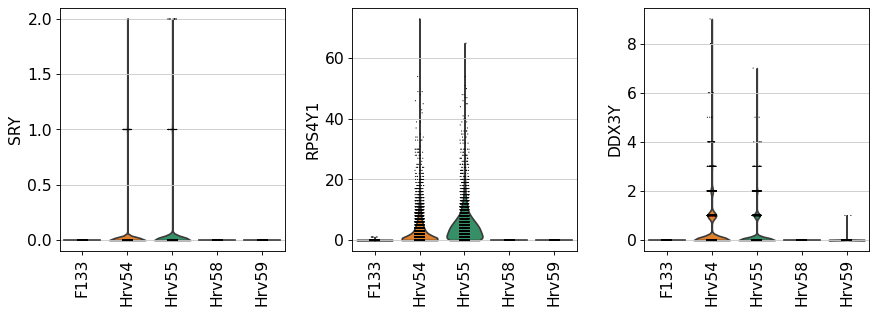

In [24]:
sc.pl.violin(adata[[ i in ['O'] for i in adata.obs.batch_collection]], ['SRY', 'RPS4Y1','DDX3Y'], groupby='individual', rotation = 90) # MALE

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.uns` of view, copying.


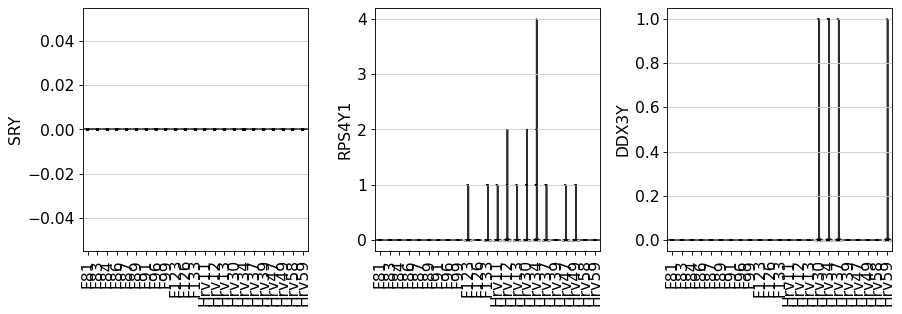

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.uns` of view, copying.


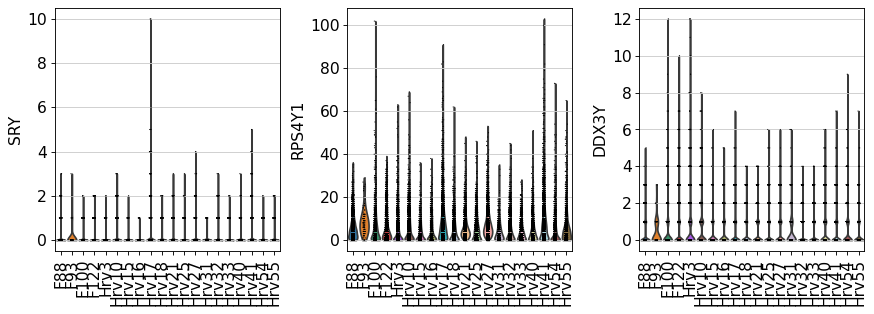

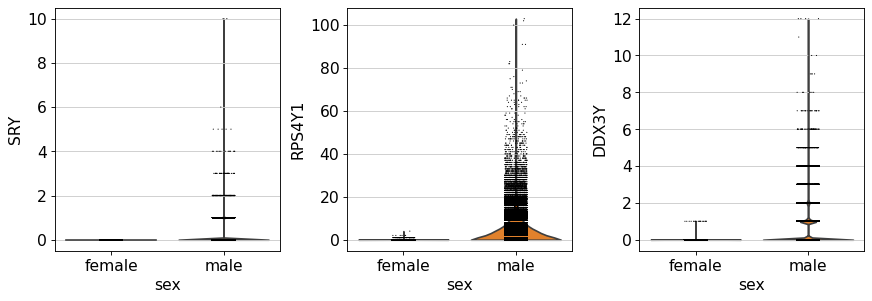

In [25]:
sc.pl.violin(adata[[ i == 'female' for i in adata.obs.sex]], ['SRY', 'RPS4Y1','DDX3Y'], groupby='individual', rotation = 90) # FEMALE
sc.pl.violin(adata[[ i == 'male' for i in adata.obs.sex]], ['SRY', 'RPS4Y1','DDX3Y'], groupby='individual', rotation = 90) # MALE
sc.pl.violin(adata, ['SRY', 'RPS4Y1','DDX3Y'], groupby='sex') # MALE

### Filter cells with few genes
Check number of genes per cell distribution and filter cells accordingly

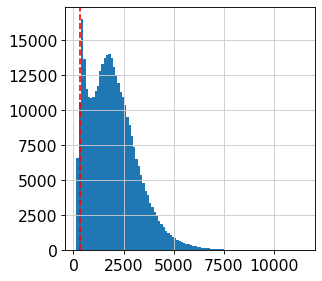

In [26]:
plt.hist(adata.obs['n_genes'], bins = 100)
plt.axvline(300, linestyle = '--', color = 'red')

In [27]:
sc.pp.filter_cells(adata, min_genes=300)

filtered out 9342 cells that have less than 300 genes expressed
/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [28]:
print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))
adata.obs['individual'].values.describe()

Total number of cells: 350219
Total number of genes: 28236


,counts,freqs
categories,,
F81,9217,0.026318
F83,11450,0.032694
F84,3432,0.009800
F86,4132,0.011798
F87,2927,0.008358
F88,10677,0.030487
F89,2037,0.005816
F91,5152,0.014711
F93,100,0.000286


### Filter genes expressed in less than 3 cells

In [29]:
sc.pp.filter_genes(adata, min_cells=3)

filtered out 6 genes that are detected in less than 3 cells
/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [30]:
print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))
adata.obs['individual'].values.describe()

Total number of cells: 350219
Total number of genes: 28230


,counts,freqs
categories,,
F81,9217,0.026318
F83,11450,0.032694
F84,3432,0.009800
F86,4132,0.011798
F87,2927,0.008358
F88,10677,0.030487
F89,2037,0.005816
F91,5152,0.014711
F93,100,0.000286



### Filter cells with large % mitochondrial genes

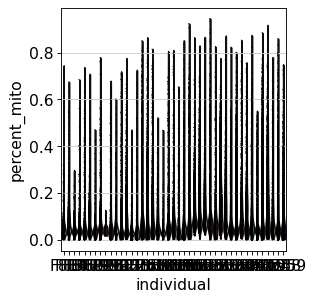

In [31]:
sc.pl.violin(adata, ['percent_mito'], groupby='individual') #hPGCs

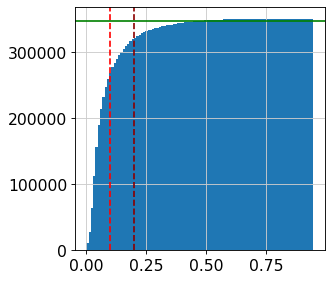

In [32]:
plt.hist(adata.obs['percent_mito'], bins = 100, cumulative=True)
plt.axvline(0.1, linestyle = '--', color = 'red')
plt.axvline(0.2, linestyle = '--', color = 'darkred')
plt.axhline(adata.n_obs*0.99, linestyle = '-', color = 'green')

In [33]:
# >20%
adata = adata[adata.obs['percent_mito'] < 0.2, :]

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [34]:
print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))
adata.obs['individual'].values.describe()
pd.DataFrame(adata.obs).to_csv(str(sc.settings.figdir)+'/metadata_filtered.csv')

Total number of cells: 319081
Total number of genes: 28230


## Save raw counts

In [35]:
adata.raw = adata.copy()

### Identify cells behaving like cc genes
Per genes analysis: identify genes behaving like known cell cycle genes

In [36]:
bdata = adata.copy()
# Normalize total counts per cell
sc.pp.normalize_per_cell(bdata, counts_per_cell_after=1e4)
# Logarithmize the data matrix
sc.pp.log1p(bdata)

normalizing by total count per cell
    finished (0:00:16): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [37]:
# Extract highly variable genes
sc.pp.highly_variable_genes(bdata)
highly_variable_genes = bdata.var["highly_variable"]
bdata = bdata[:, highly_variable_genes]

extracting highly variable genes
    finished (0:00:16)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [38]:
# Traspose matrix for a GENE-centered analysis
bdata = bdata.copy().T

In [39]:
bdata.X.shape

(2017, 319081)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    with n_comps=50
    finished (0:00:28)


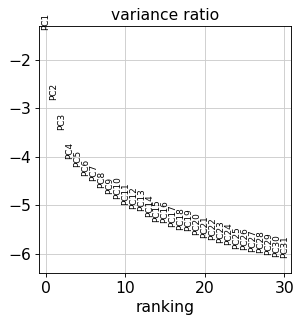

In [40]:
# Scale data to unit variance and zero mean
sc.pp.scale(bdata, max_value=10)

# Scatter plot in PCA coordinates
sc.tl.pca(bdata)
bdata.obsm['X_pca'] *= -1  # multiply by -1 to match Seurat
# Plot the variance ratio
sc.pl.pca_variance_ratio(bdata, log=True, save='_ccg_identification.pdf')

In [41]:
num_pcs = 20
# Compute a neighborhood graph of observations
sc.pp.neighbors(bdata, n_pcs=num_pcs)
# Embed the neighborhood graph using UMAP
sc.tl.umap(bdata)
# Cluster GENES into subgroups using louvain: resolution < 1 to find less clusters
sc.tl.louvain(bdata, resolution=1)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:13)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 15 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


In [49]:
type(bdata.obs['known_cyclers'])

pandas.core.series.Series

... storing 'known_cyclers' as categorical


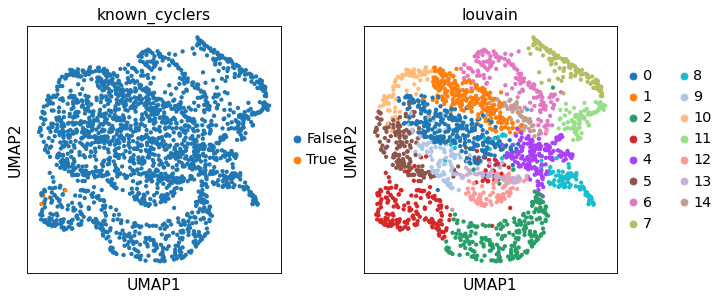

CCNB2    3
CDK1     3
MKI67    3
PCNA     3
Name: louvain, dtype: category
Categories (15, object): ['0', '1', '2', '3', ..., '11', '12', '13', '14']


In [52]:
# Locate ccs cluster
bdata.obs['known_cyclers'] = [i in ['CDK1','MKI67','CCNB2','PCNA'] for i in bdata.obs_names]
bdata.obs['known_cyclers'] = [ str(i) for i in  bdata.obs['known_cyclers']]
sc.pl.umap(bdata, color=['known_cyclers', 'louvain'], color_map='OrRd',save='_ccg_identification.pdf')
print(bdata.obs.loc[[i in ['CDK1','MKI67','CCNB2','PCNA'] for i in bdata.obs_names],'louvain'])

In [53]:
ccgs_cl = bdata.obs.loc['CDK1',['louvain']][0]
print("Cell cycle genes cluster is "+ccgs_cl)

Cell cycle genes cluster is 3


### Remove ccgs

In [54]:
# Add unstructured dict-like annotation for ccgs
adata.uns['ccgs'] = list(bdata.obs[bdata.obs['louvain']==ccgs_cl].index)

In [55]:
# Remove cc genes
print('Total number of genes before ccg filter: {:d}'.format(adata.n_vars))
adata = adata[:,[i not in adata.uns['ccgs'] for i in adata.var_names]]
print('Total number of genes after ccg filter: {:d}'.format(adata.n_vars))

Total number of genes before ccg filter: 28230


/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Total number of genes after ccg filter: 28037


In [56]:
# Move plots
MovePlots('ccg_identification','ccg_identification')

### Normalize per cell and log transform

After removing unwanted cells and genes from the dataset, the next step is to normalize the data. 
By default, we employ a global-scaling normalization method “LogNormalize” that normalizes the feature expression measurements for each cell by the total expression, multiplies this by a scale factor (10,000 by default), and log-transforms the result. 

In [57]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

normalizing by total count per cell
Trying to set attribute `.obs` of view, copying.
    finished (0:00:25): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


### Filter HVGs in bdata and do PCA with them

In [58]:
bdata = adata.copy()
sc.pp.highly_variable_genes(bdata, min_mean=0.0125, max_mean=3, min_disp=0.5)
for col in ['highly_variable','means', 'dispersions', 'dispersions_norm']:
    adata.var[col] = bdata.var[col]
bdata = bdata[:, bdata.var['highly_variable']]
print('Total number of cells: {:d}'.format(bdata.n_obs))
print('Total number of genes: {:d}'.format(bdata.n_vars))

extracting highly variable genes
    finished (0:00:16)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Total number of cells: 319081
Total number of genes: 1879


In [59]:
sc.pp.scale(bdata, max_value=10)
sc.tl.pca(bdata, svd_solver='arpack', n_comps=50)

/opt/conda/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:810: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:43)


## Transfer PCA to the main adata

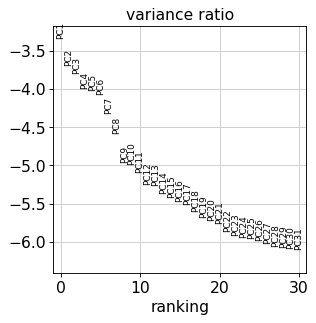

In [60]:
#fill NaNs with False so that subsetting to HVGs is possible
adata.var['highly_variable'].fillna(value=False, inplace=True)
adata.obsm['X_pca'] = bdata.obsm['X_pca'].copy()
adata.uns['pca'] = bdata.uns['pca'].copy()
adata.varm['PCs'] = np.zeros(shape=(adata.n_vars, 50))
adata.varm['PCs'][adata.var['highly_variable']] = bdata.varm['PCs']
sc.pl.pca_variance_ratio(adata, log=True, save='.pdf')

## Load scrublet

In [61]:
scorenames = ['scrublet_score','scrublet_cluster_score','zscore','bh_pval','bonf_pval']

scrdf = []
for sample in meta.index:
    scrdf.append(pd.read_csv('scrublet-scores/'+sample+'.csv', header=0, index_col=0))
scrdf = pd.concat(scrdf)
scrdf.index = [i.replace('-1', '') for i in scrdf.index]
for score in scorenames:
    adata.obs[score] = scrdf[score]
adata.obs['is_doublet'] = adata.obs['bonf_pval'] < 0.01

# Load previous annotations

In [3]:
# Add old cluster name
clu_annot = pd.read_csv('../scRNAseq_analysis_FCA_2sex/figures_manual_annotation/clustering_metadata.csv', header=0, index_col=0)
import collections 

if collections.Counter(adata.obs.index) == collections.Counter(clu_annot.index): 
    print ("The lists are identical") 
else : 
    print ("The lists are not identical") 
    
vars2import = ['clusters']
for var in vars2import:
    adata.obs[var] = clu_annot[var]

The lists are not identical


In [4]:
# Add old cluster subname
meta_som = pd.read_csv('/nfs/team292/lg18/with_valentina/gonadsV1_freezed/supporting_annotated.csv')
meta_som = meta_som.set_index('Unnamed: 0')
meta_som.head()

meta_germ = pd.read_csv('/nfs/team292/lg18/with_valentina/gonadsV1_freezed/germcells_annotated.csv')
meta_germ = meta_germ.set_index('Unnamed: 0')
meta_germ.head()

meta_mes = pd.read_csv('/nfs/team292/lg18/with_valentina/gonadsV1_freezed/mesenchymalPV_annotated.csv')
meta_mes = meta_mes.set_index('Unnamed: 0')
meta_mes.head()

som_cell_annot = meta_som['annotated_clusters'].to_dict()
germ_cell_annot = meta_germ['annotated_clusters'].to_dict()
mes_cell_annot = meta_mes['annotated_clusters'].to_dict()
cell_annot = {**som_cell_annot, **germ_cell_annot, **mes_cell_annot}
adata.obs['sub_clusters'] = adata.obs_names.map(cell_annot)

# Replace NaN with big clusters 
adata.obs['sub_clusters'] = adata.obs['sub_clusters'].fillna(adata.obs['clusters'])

# Save

In [3]:
adata = sc.read('FCA-M1preprocessing.h5ad')
adata.X.shape

(319081, 28037)

In [62]:
# format some metadata
# PCW as numerical
adata.obs['PCW'] = adata.obs.stage.astype('float').tolist()
# source: L=london; N=newcastle
adata.obs['sample_source'] = 'N'
idx = np.array(['Hrv' in i for i in adata.obs['individual']])
adata.obs.at[ idx, 'sample_source']  = 'L'

In [8]:
adata.write('FCA-M1preprocessing.h5ad')

## Visualize data

### UMAP

In [5]:
n_pcs = 21

In [6]:
# Visualize
sc.pp.neighbors(adata, n_pcs = n_pcs)
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 21
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:23)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:07:31)


... storing 'clusters' as categorical
... storing 'sub_clusters' as categorical


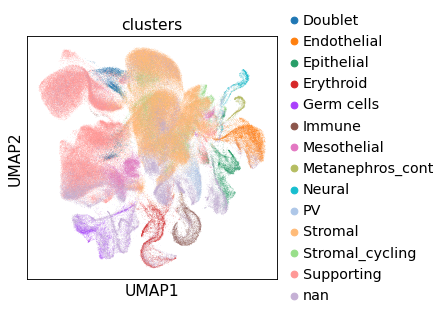

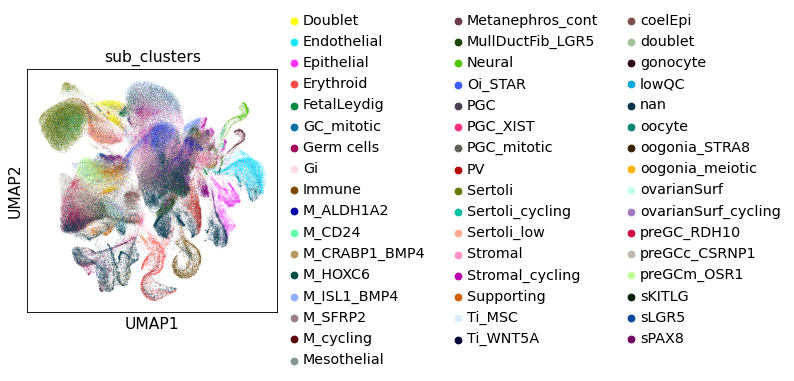

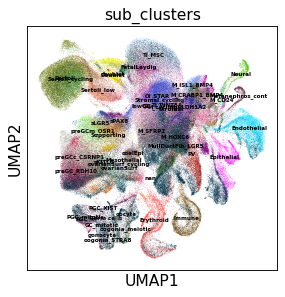

In [7]:
sc.pl.umap(adata, color=['clusters'], ncols = 4, color_map='OrRd', use_raw=False)
sc.pl.umap(adata, color=['sub_clusters'], ncols = 4, color_map='OrRd', use_raw=False)
sc.pl.umap(adata, color=['sub_clusters'], ncols = 4, color_map='OrRd', use_raw=False, legend_loc='on data', legend_fontsize=5)

# Plot markers

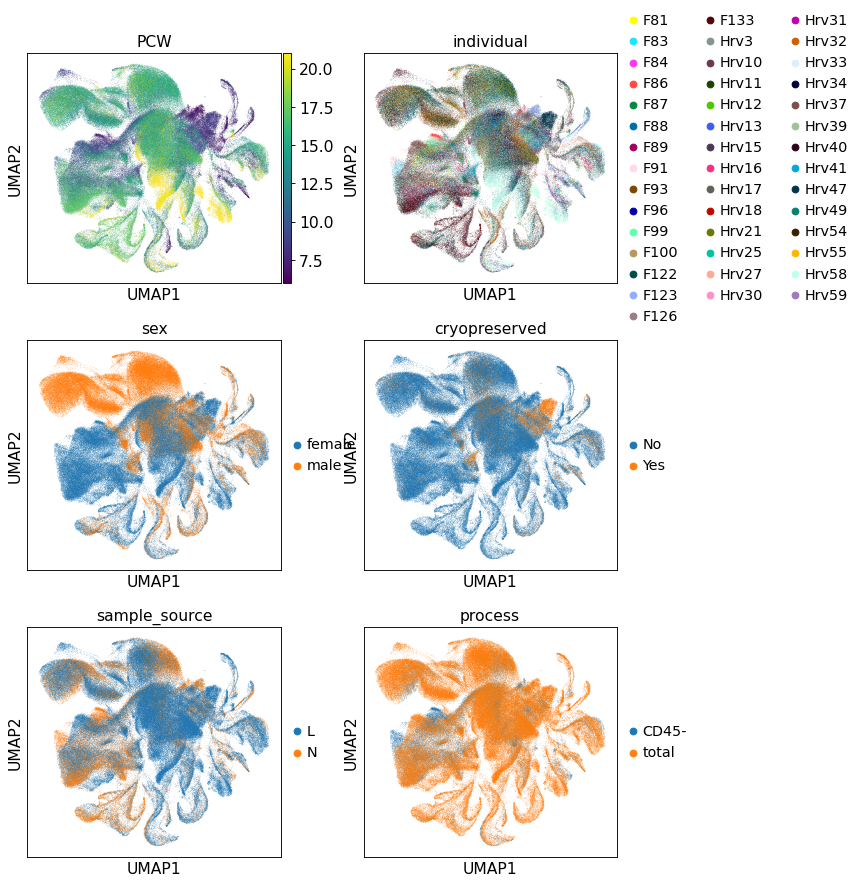

In [66]:
sc.pl.umap(adata, color=['PCW', 'individual', 'sex', 'cryopreserved', 'sample_source', 'process'], save='_predoublet.pdf', ncols = 2)

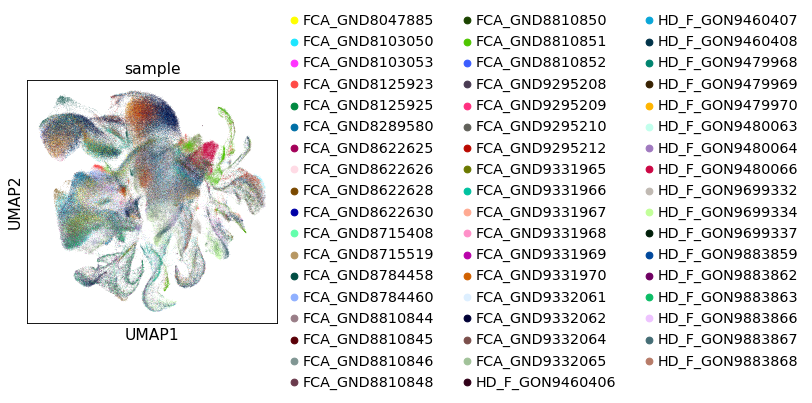

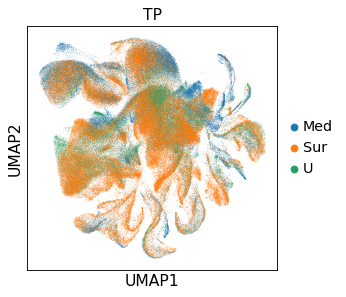

In [67]:
sc.pl.umap(adata, color=['sample'])
sc.pl.umap(adata, color=['TP'])

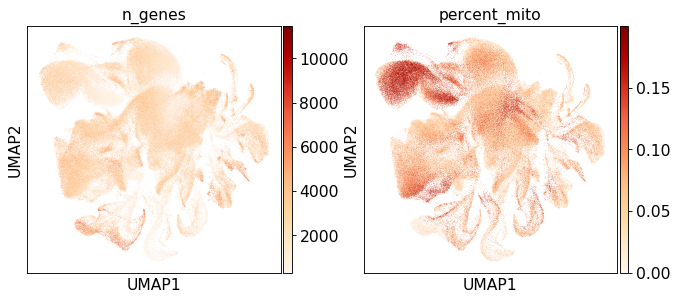

In [68]:
sc.pl.umap(adata, color=['n_genes', 'percent_mito'], save='_predoublet_stats.pdf', ncols = 2, color_map='OrRd', use_raw=False)

In [ ]:
sc.pp.scale(adata, max_value=10, copy=True)
sc.pl.umap(adata, color=['POU5F1', 'FIGLA', 'DAZL', 'STRA8', 'KIT', 'SRY', 'RPS4Y1','DDX3Y'], save='_predoublet_markers.pdf', ncols = 2, color_map='OrRd', use_raw=True)
sc.pl.umap(adata, color=["FIGLA", "FOXL2", "DCN", "EPCAM", "SOX9", 'KLK11', 'ASCL1', 'PECAM1', 'PTPRC', 'PRL', 'RPS4Y1','DDX3Y'], save='_predoublet-markers_global.pdf',color_map='OrRd', use_raw=True)
sc.pl.umap(adata, color=["PAX8", "LGR5", 'SOX9', 'EPCAM'],color_map='OrRd', use_raw=True)
sc.pl.umap(adata, color=['INSL3', 'GLI1', 'HHIP', 'PTCH2'], color_map='OrRd', use_raw=True )
sc.pl.umap(adata, color=['FDX1'], color_map='OrRd', use_raw=True )

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 20 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:01:43)


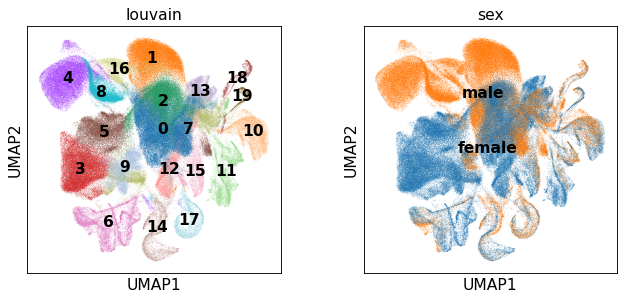

In [9]:
sc.tl.louvain(adata, resolution=0.4)
sc.pl.umap(adata, color=['louvain', 'sex'],legend_loc='on data',save='_clustering_clusnumbers.pdf' )

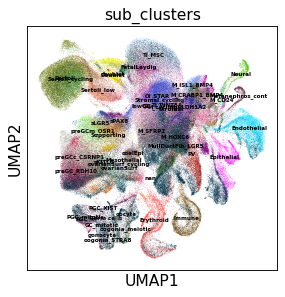

In [10]:
sc.pl.umap(adata, color=['sub_clusters'], ncols = 4, color_map='OrRd', use_raw=False, legend_loc='on data', legend_fontsize=5)

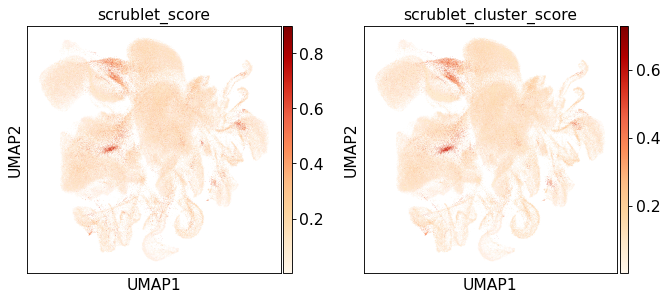

In [11]:
sc.pl.umap(adata, color=['scrublet_score', 'scrublet_cluster_score'], color_map='OrRd')